# **Introdução**
A estimativa do gasto calórico é um elemento central em diversas aplicações relacionadas à saúde, esportes, nutrição e monitoramento fisiológico. Em cenários como dietas personalizadas, programas de atividade física ou acompanhamento clínico, prever com precisão o número de calorias gastas durante uma atividade pode auxiliar na tomada de decisões mais eficazes e no desenvolvimento de soluções inteligentes. Nesse contexto, o desafio Predict Calorie Expenditure, disponibilizado na plataforma Kaggle, propõe a construção de modelos capazes de estimar o gasto energético com base em variáveis fisiológicas e biométricas.

O dataset contém medições coletadas de indivíduos submetidos a diferentes intensidades de esforço físico. Entre as variáveis disponíveis estão sinais vitais, características corporais e indicadores de desempenho, como frequência cardíaca e temperatura corporal. O objetivo é treinar modelos de aprendizado de máquina capazes de realizar regressão sobre a variável-alvo: Calorie Expenditure (Calorias Gastas).

Desafio Kaggle: https://www.kaggle.com/competitions/playground-series-s5e5/overview

# **Exploração Inicial do Dataset**
A etapa de exploração inicial tem como objetivo compreender a estrutura e as características fundamentais do conjunto de dados, verificando possíveis problemas como valores ausentes, variáveis irregulares ou relações inesperadas entre atributos.


1.   Valida se os arquivos de treino e teste existem

In [4]:
import os
import warnings
warnings.filterwarnings('ignore')

TRAIN_PATH = './train.csv'
VALID_PATH = './test.csv'
# TRAIN_PATH = './kaggle/input/playground-series-s5e5/train.csv'
# TEST_PATH = './kaggle/input/playground-series-s5e5/test.csv'

if os.path.exists(TRAIN_PATH) == False:
  print('Arquivo de treino NÃO encontrado')
else:
  print('Arquivo de treino encontrado')

if os.path.exists(VALID_PATH) == False:
  print('Arquivo de validação NÃO encontrado')
else:
  print('Arquivo de validação encontrado')


Arquivo de treino encontrado
Arquivo de validação encontrado



2.   Carrega os dados de treino e teste


In [5]:
import numpy as np
import pandas as pd

train = pd.read_csv(TRAIN_PATH)
validation  = pd.read_csv(VALID_PATH)



3.   Estrutura básica



In [6]:
print("Dimensões do dataset de treino:", train.shape)
print("Dimensões do dataset de teste:", validation.shape)

Dimensões do dataset de treino: (750000, 9)
Dimensões do dataset de teste: (250000, 8)


In [7]:
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [9]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,750000.0,NaN,NaN,NaN,374999.5,216506.495284,0.0,187499.75,374999.5,562499.25,749999.0
Sex,750000,2,female,375721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,750000.0,NaN,NaN,NaN,41.420404,15.175049,20.0,28.0,40.0,52.0,79.0
Height,750000.0,NaN,NaN,NaN,174.697685,12.824496,126.0,164.0,174.0,185.0,222.0
Weight,750000.0,NaN,NaN,NaN,75.145668,13.982704,36.0,63.0,74.0,87.0,132.0
Duration,750000.0,NaN,NaN,NaN,15.421015,8.354095,1.0,8.0,15.0,23.0,30.0
Heart_Rate,750000.0,NaN,NaN,NaN,95.483995,9.449845,67.0,88.0,95.0,103.0,128.0
Body_Temp,750000.0,NaN,NaN,NaN,40.036253,0.779875,37.1,39.6,40.3,40.7,41.5
Calories,750000.0,NaN,NaN,NaN,88.282781,62.395349,1.0,34.0,77.0,136.0,314.0


In [10]:
train.dtypes

id              int64
Sex            object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object



4.   Verificando valores ausentes



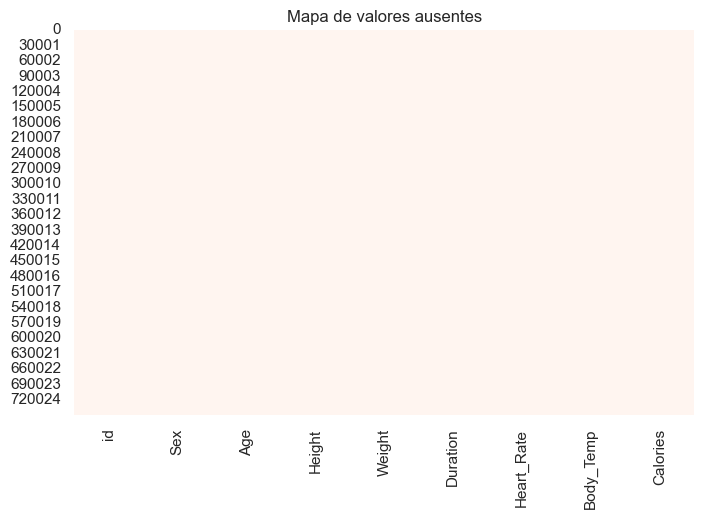

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
plt.style.use("default")
sns.set_palette("viridis")
sns.set_theme()

plt.figure(figsize=(8,5))
sns.heatmap(train.isna(), cbar=False, cmap="Reds")
plt.title("Mapa de valores ausentes")
plt.show()

# Preparação dos Dados


1.   Tratamento de Dados Faltantes: Estratégias para lidar com dados ausentes.



In [13]:
train.isna().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

A presença de valores ausentes em um dataset pode comprometer a qualidade do processo de aprendizado de máquina, prejudicando tanto a fase de treinamento quanto a capacidade de generalização dos modelos. Por isso, adotamos uma estratégia sistemática de imputação para lidar com dados faltantes.

1. Dados Numéricos — Imputação pela Média

Para variáveis numéricas (como idade, peso, duração da atividade, frequência cardíaca etc.), utilizamos a média como valor de preenchimento.

Justificativas:
- A média é uma medida de tendência central amplamente utilizada e tende a representar bem a distribuição quando ela não é extremamente assimétrica.
- Preserva a escala original dos dados.
- Evita a perda de amostras que ocorreria com a remoção de linhas incompletas.
- É especialmente apropriada para algoritmos baseados em distância (KNN, KMeans) ou modelos lineares.

2. Dados Categóricos — Imputação pelo Modo

Para atributos categóricos (ex.: sexo, tipo de atividade, se existirem no dataset), utilizamos o modo, que é o valor mais frequente na coluna.

Justificativas:
- O modo preserva a categoria dominante da variável.
- Evita distorções que seriam criadas ao tentar “inventar” categorias novas.
- Mantém a coerência sem produzir valores impossíveis.
- É uma estratégia simples e estatisticamente lógica para variáveis qualitativas.



> Por que não removemos as linhas com valores faltantes?
- Em muitos datasets reais, remover linhas reduz drasticamente o tamanho da amostra.
- Isso prejudica a capacidade de generalização dos modelos.
- Além disso, a remoção pode introduzir viés, caso os dados ausentes não sejam aleatórios.
- A imputação, portanto, é uma forma de preservar o conjunto de dados e manter a integridade estatística da análise.

In [14]:
for col in train.columns:
  if train[col].dtype in ["float64", "int64"]:
      train[col].fillna(train[col].mean(), inplace=True)
  else:
      train[col].fillna(train[col].mode()[0], inplace=True)

train.isna().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64



2.   Normalização/Padronização: Se necessário, para técnicas que requerem dados normalizados.

A coluna 'Sexo', que é categórica (por exemplo, 'masculino', 'feminino'), é convertida em representações numéricas (por exemplo, 0, 1) usando o LabelEncoder.

Modelos como KNN, KMeans, redes neurais e regressão regularizada funcionam melhor com dados padronizados. A padronização transforma os dados para média = 0 e desvio padrão = 1.

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
scaler = StandardScaler()

# Ajusta e transforma a coluna 'Sex' nos dados de treinamento
train['Sex_Encoded'] = le.fit_transform(train['Sex'])

# Define as características (X) e o alvo (y) para o treinamento.
X = train.drop(['Sex', 'Calories'], axis=1)
y = train['Calories']

# Aplicando StandardScaler
X_scaled = scaler.fit_transform(X)

# Convertendo novamente para DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Transforma a coluna 'Sex' nos dados de validação (usando o codificador ajustado nos dados de treinamento).
validation['Sex_Encoded'] = le.transform(validation['Sex'])

# Define as características para o conjunto de validação.
# X_test = test[features]

# Aplicando StandardScaler
# X_test_scaled = scaler.transform(X_test)

# Convertendo novamente para DataFrame
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Exemplo de dados padronizados:")
X_scaled.head()

Exemplo de dados padronizados:


,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Sex_Encoded
0,-1.732048,-0.357192,1.115235,0.490201,1.266324,0.583714,1.235772,1.001925
1,-1.732044,1.487943,-0.912137,-1.083172,-0.888309,-1.109436,-0.431163,-0.998079
2,-1.732039,0.631273,-1.068088,-0.797104,-1.008011,-1.215258,-0.302938,-0.998079
3,-1.732035,-1.411555,1.349162,1.062337,1.146622,1.007002,0.851095,1.001925
4,-1.732030,-0.225397,-0.678209,-1.011655,1.146622,0.689536,0.722869,-0.998079


3. Divisão dos Dados

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (600000, 8)
Tamanho do conjunto de teste: (150000, 8)


# Exploração e Visualização dos Dados



1.   Distribuição da variável-alvo



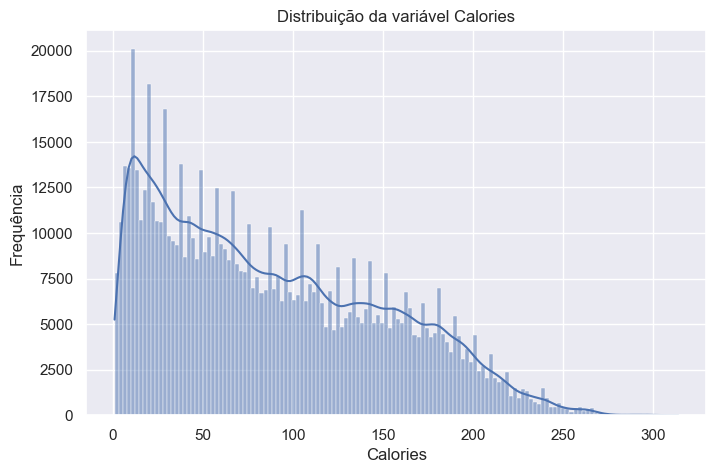

In [17]:
if "Calories" in train.columns:
  plt.figure(figsize=(8,5))
  sns.histplot(train["Calories"], kde=True)
  plt.title("Distribuição da variável Calories")
  plt.xlabel("Calories")
  plt.ylabel("Frequência")
  plt.show()
else:
  print("A coluna 'Calories' não foi encontrada no dataset.")



2.   Matriz de correlação



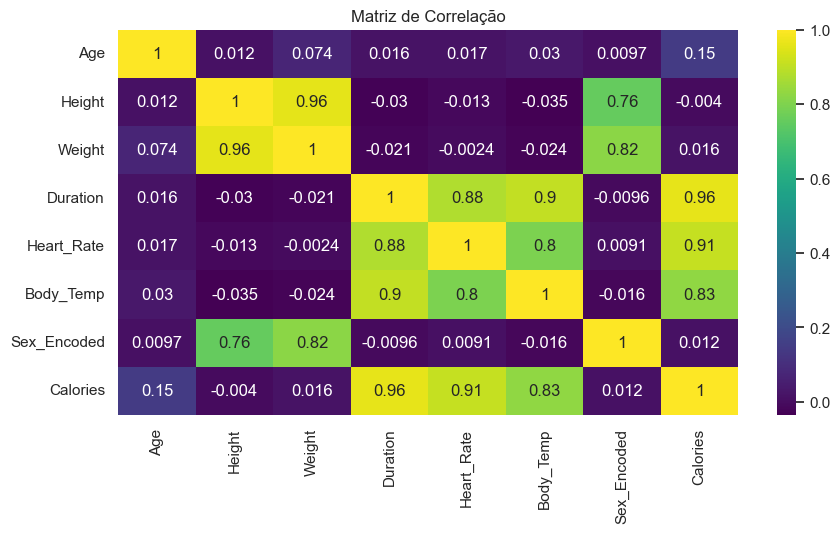

In [18]:
plt.figure(figsize=(10,5))
corr_matrix = train[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Sex_Encoded', 'Calories']]
sns.heatmap(corr_matrix.corr(), annot=True, cmap="viridis")
plt.title("Matriz de Correlação")
plt.show()



3.   Scatterplots com variáveis importantes


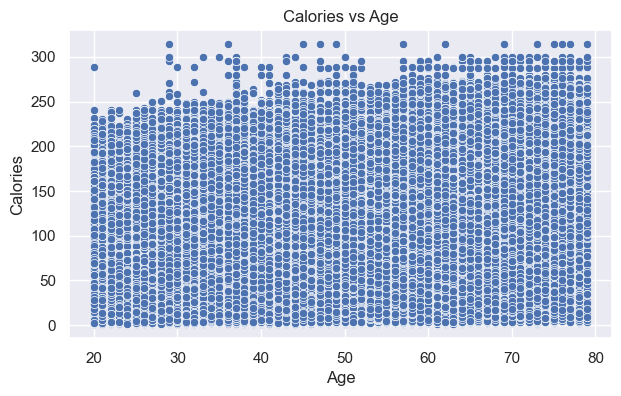

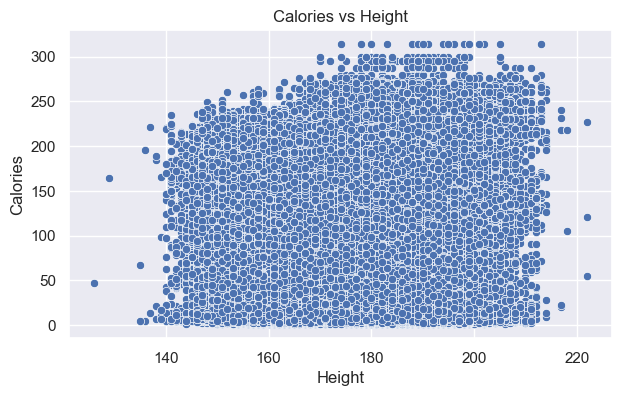

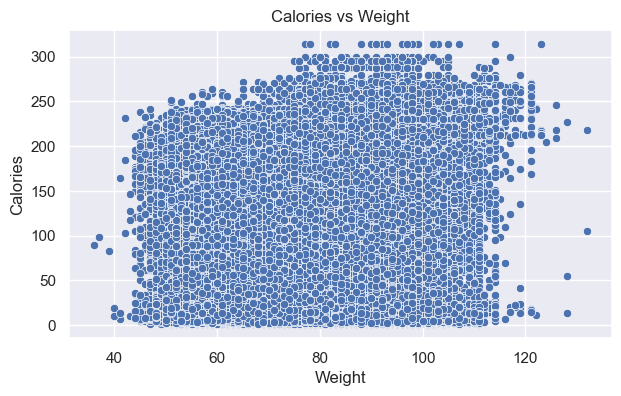

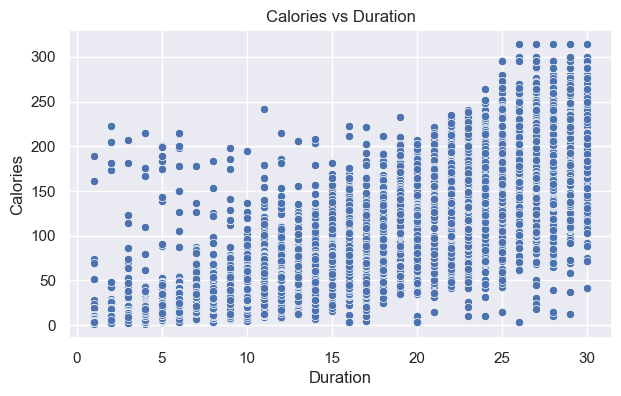

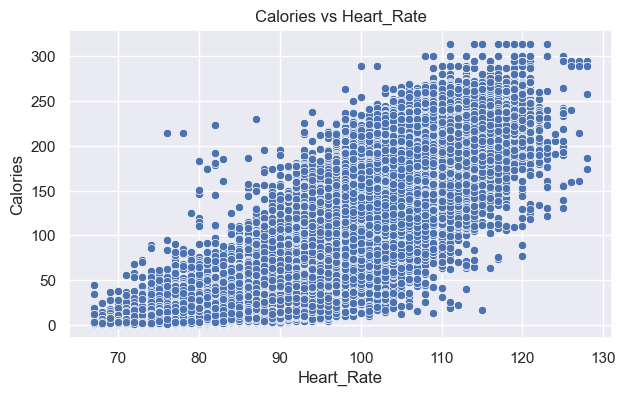

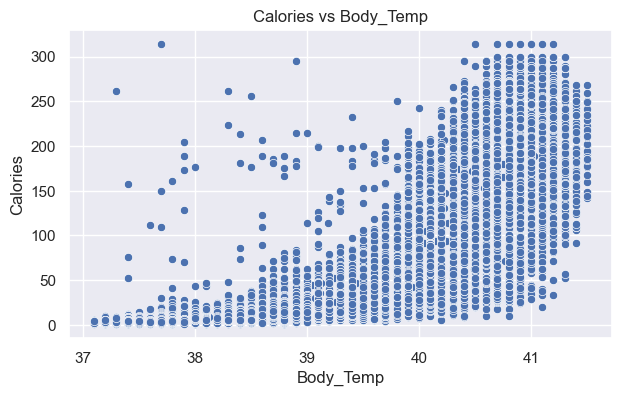

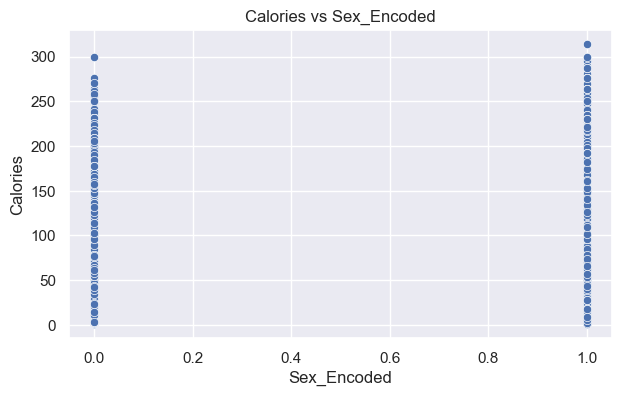

In [19]:
for col in ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Sex_Encoded']:
  if col in train.columns:
    plt.figure(figsize=(7,4))
    sns.scatterplot(x=train[col], y=train["Calories"])
    plt.title(f"Calories vs {col}")
    plt.xlabel(col)
    plt.ylabel("Calories")
    plt.show()
    print(' ')



4.   Boxplots para visualização de possíveis outliers



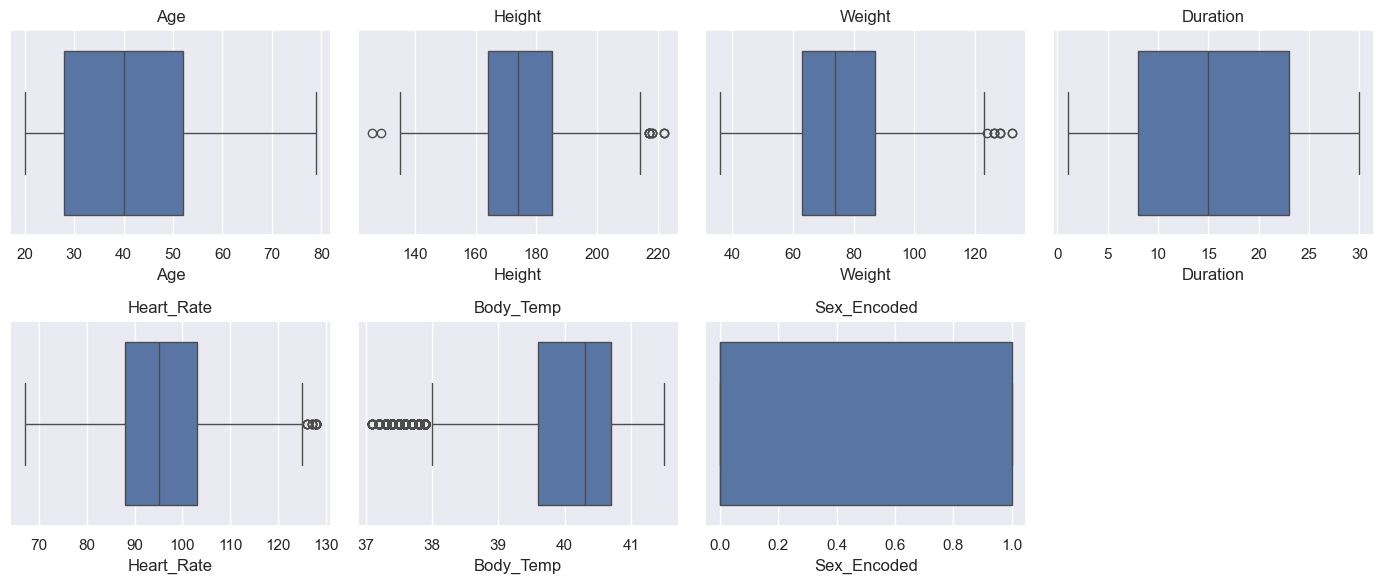

In [20]:
plt.figure(figsize=(14, 6))
for i, col in enumerate(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Sex_Encoded'], 1):
  plt.subplot(2, 4, i)
  sns.boxplot(x=train[col], orient='h')
  plt.title(col)
plt.tight_layout()
plt.show()

5.   Quais features são relevantes?

A seleção das variáveis utilizadas na modelagem do problema fundamenta-se em princípios fisiológicos, análises estatísticas preliminares e no comportamento observado das features durante a exploração inicial dos dados. Cada atributo escolhido possui relação direta, comprovada ou altamente provável, com o gasto energético do indivíduo durante a realização de uma atividade física.

A variável **Duration**, que representa a duração do exercício, é uma das mais relevantes para o modelo, uma vez que o gasto calórico é proporcional ao tempo total de esforço. Quanto maior o tempo dedicado à atividade, maior é a soma do esforço metabólico acumulado, resultando em uma elevação direta na quantidade de calorias gastas. Esse comportamento é amplamente reconhecido em estudos de fisiologia do exercício, reforçando sua importância no contexto do problema.

A **frequência cardíaca (Heart_Rate)** também se destaca como uma das variáveis preditoras mais informativas. Ela funciona como um indicador imediato da intensidade do exercício, refletindo o nível de esforço exigido pelo corpo. À medida que a intensidade aumenta, a demanda metabólica cresce, elevando o consumo de energia. Assim, a frequência cardíaca fornece ao modelo uma leitura precisa da intensidade instantânea da atividade, o que a torna essencial para estimar o gasto calórico.

A **temperatura corporal (Body_Temp)** desempenha um papel complementar, pois a elevação da temperatura é consequência natural do aumento do metabolismo durante o exercício. O corpo intensifica a produção de calor para sustentar as reações bioquímicas necessárias ao esforço físico. Dessa forma, a temperatura funciona como um indicador indireto da carga metabólica, contribuindo para diferenciar níveis de esforço semelhantes em duração, mas distintos em intensidade.

As variáveis **Sex (Sex_Encoded)**, **Age**, **Height** e **Weight** representam características físicas e fisiológicas individuais que influenciam a forma como cada corpo responde ao exercício. A idade afeta o metabolismo basal e a capacidade cardiorrespiratória, que variam naturalmente ao longo da vida, podendo alterar a quantidade de energia gasta para realizar a mesma atividade. O peso é uma das variáveis mais diretamente relacionadas ao gasto calórico, pois indivíduos mais pesados necessitam de mais energia para movimentar sua massa corporal. Já a altura funciona como um indicador da estrutura corporal, que também impacta o consumo energético.

Em conjunto, essas variáveis fornecem ao modelo uma visão abrangente tanto da **intensidade e duração do esforço** (via Heart_Rate, Body_Temp e Duration) quanto das **características individuais que modulam o gasto energético** (via Age, Height e Weight). Além de apresentarem correlações relevantes durante a análise exploratória, elas trazem informações não redundantes, garantindo que o modelo possa capturar relações lineares e não lineares de forma eficiente.

# Aplicação das Técnicas de Aprendizado de Máquina

A modelagem teve como objetivo estimar o gasto calórico a partir de variáveis fisiológicas e características individuais relacionadas ao esforço físico. Para isso, foram implementados diferentes modelos representando distintas famílias de algoritmos estudadas na disciplina, permitindo explorar relações lineares, não lineares, interações entre variáveis e comportamentos complexos não facilmente capturados por abordagens simples.

Os modelos foram selecionados com base em três critérios:
1. Adequação ao tipo de problema (regressão)
2. Exploratório pedagógico (uso das técnicas vistas na disciplina)
3. Potencial preditivo demonstrado em estudos anteriores envolvendo dados fisiológicos


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# FUNÇÃO RMSLE PERSONALIZADA
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, np.maximum(0, y_pred)))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# K-FOLD PARA VALIDAÇÃO CRUZADA
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

In [22]:
# Garantindo que tudo esteja em numpy arrays:
# X_data = X_scaled.values
# y_data = y.values
X_data = X_train.values
y_data = y_train.values
X_data.shape, y_data.shape

((600000, 8), (600000,))

In [23]:
# =====================================
# MODELO 1: RANDOM FOREST
# =====================================

pipeline_rf = Pipeline([
    ("regressor", RandomForestRegressor(
        random_state=42,
        bootstrap=True
    ))
])

param_dist = {
    "regressor__n_estimators": [50, 80, 120],
    "regressor__max_depth": [8, 12, 16],
    "regressor__min_samples_leaf": [2, 4, 6],
    "regressor__min_samples_split": [4, 8, 12],
    "regressor__max_samples": [0.6, 0.8, 1.0]
}

search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring=rmsle_scorer,
    cv=kfold,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search_rf.fit(X_data, y_data)

best_rf = search_rf.best_estimator_

print("=====================================")
print("MELHOR MODELO RANDOM FOREST")
print("Best RMSLE:", abs(search_rf.best_score_))
print("Best Params:", search_rf.best_params_)
print("=====================================\n")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
MELHOR MODELO RANDOM FOREST
Best RMSLE: 0.06220008806413015
Best Params: {'regressor__n_estimators': 120, 'regressor__min_samples_split': 12, 'regressor__min_samples_leaf': 2, 'regressor__max_samples': 0.6, 'regressor__max_depth': 16}



In [24]:
# =====================================
# MODELO 2: GRADIENT BOOSTING REGRESSOR
# =====================================

pipeline_gb = Pipeline([
    ("regressor", GradientBoostingRegressor(random_state=42))
])

param_dist_gb = {
    "regressor__n_estimators": [100, 200, 300],
    "regressor__learning_rate": [0.03, 0.05, 0.1],
    "regressor__max_depth": [2, 3, 4],
    "regressor__subsample": [0.6, 0.8, 1.0],     # Acelera e reduz overfitting
    "regressor__max_features": ["sqrt", "log2", None]  # Acelera MUITO
}

search_gb = RandomizedSearchCV(
    estimator=pipeline_gb,
    param_distributions=param_dist_gb,
    n_iter=20,            # número ótimo para big data
    scoring=rmsle_scorer,
    cv=3,                 # reduz tempo drasticamente
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search_gb.fit(X_data, y_data)

best_gb = search_gb.best_estimator_

print("=====================================")
print("MELHOR MODELO - GRADIENT BOOSTING (OTIMIZADO)")
print("Best RMSLE:", abs(search_gb.best_score_))
print("Best Params:", search_gb.best_params_)
print("=====================================")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
MELHOR MODELO - GRADIENT BOOSTING (OTIMIZADO)
Best RMSLE: 0.0759303415552751
Best Params: {'regressor__subsample': 0.8, 'regressor__n_estimators': 300, 'regressor__max_features': 'log2', 'regressor__max_depth': 4, 'regressor__learning_rate': 0.1}


In [25]:
# ------------------------------------------------------------------
# 4. Avaliação dos modelos
# ------------------------------------------------------------------

def evaluate(model, X_test, y_test):
  pred = model.predict(X_test)
  r2 = r2_score(y_test, pred)
  mae = mean_absolute_error(y_test, pred)
  mse = mean_squared_error(y_test, pred)
  rmse = np.sqrt(mse)

  return r2, mae, mse, rmse

rf_r2, rf_mae, rf_mse, rf_rmse = evaluate(best_rf, X_test, y_test)
gb_r2, gb_mae, gb_mse, gb_rmse = evaluate(best_gb, X_test, y_test)


# ------------------------------------------------------------------
# 5. Comparação final das métricas
# ------------------------------------------------------------------

results = pd.DataFrame({
    "Modelo": ["Random Forest", "Gradient Boosting"],
    "R²": [rf_r2, gb_r2],
    "MAE": [rf_mae, gb_mae],
    "MSE": [rf_mse, gb_mse],
    "RMSE": [rf_rmse, gb_rmse],
    "RMSLE": [abs(search_rf.best_score_), abs(search_gb.best_score_)]
})

print(results)

              Modelo        R²       MAE        MSE      RMSE    RMSLE
0      Random Forest  0.996490  2.212318  13.602982  3.688222  0.06220
1  Gradient Boosting  0.995889  2.570898  15.933859  3.991724  0.07593


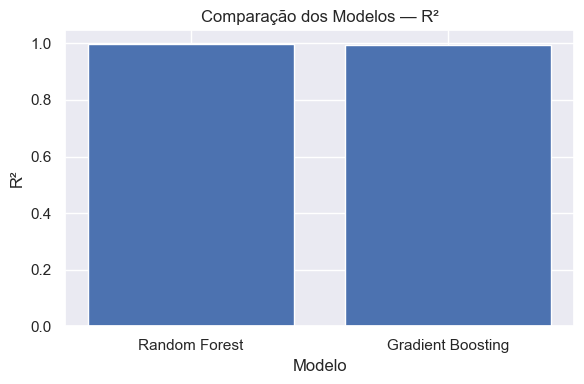

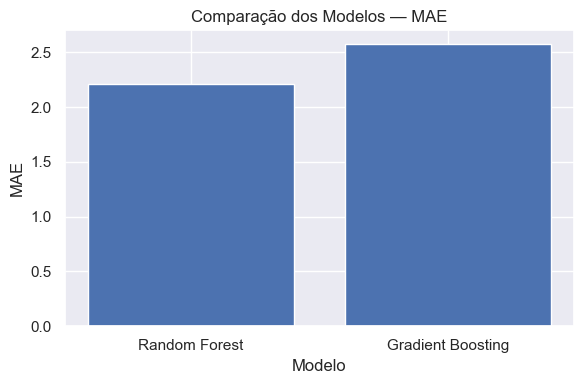

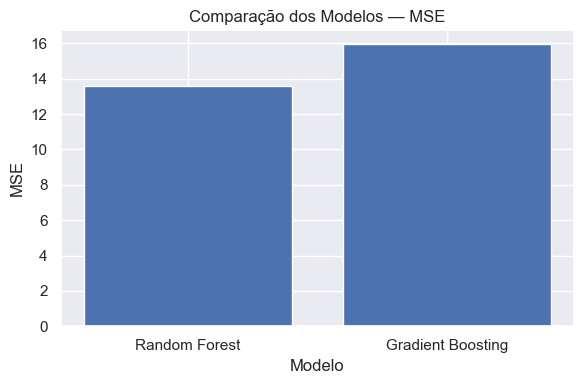

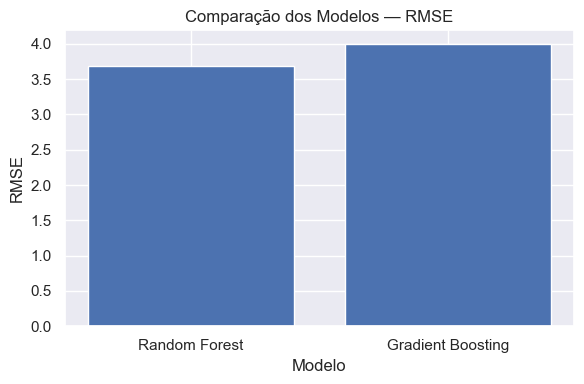

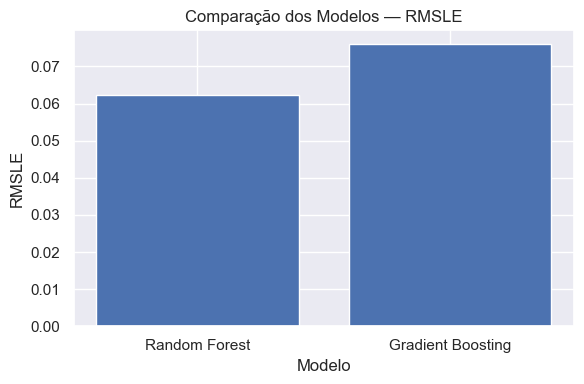

In [26]:
# ================================
# GRÁFICOS DAS MÉTRICAS
# ================================
metrics = ["R²", "MAE", "MSE", "RMSE", "RMSLE"]

for metric in metrics:
  plt.figure(figsize=(6, 4))
  plt.bar(results["Modelo"], results[metric])
  plt.title(f"Comparação dos Modelos — {metric}")
  plt.xlabel("Modelo")
  plt.ylabel(metric)
  plt.tight_layout()
  plt.show()